In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [206]:
bank = pd.read_csv("./Downloads/bank.csv")

In [207]:
# top five value of bank data
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [208]:
#description of data
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


###  Here we see that some ouliers might be present in features like balance ,pdays because of difference between std and mean is very drastic

In [209]:
#Info of data
bank.info()## We see that there is no NuLL and datatype of features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [210]:
#Dimensions of Data
print("Shape of Data",bank.shape)
print("Dimensions of Data",bank.shape[1])
print("Examples of Data",bank.shape[0])

Shape of Data (4521, 17)
Dimensions of Data 17
Examples of Data 4521


In [211]:
#Checking NULL values Of data if present or not
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### As we see that there is no NULL column in our dataset

In [212]:
#Checking Duplicates value in our datasets
Is_duplicate = bank.duplicated() 
print("total duplicate Value:",sum(Is_duplicate))

total duplicate Value: 0


In [213]:
#Check if our dataset is imbalanced or balanced data
bank['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

### Clearly we see that our dataset is imbalanced it have 4000 NO values

## Explaratory Data Analysis

In [214]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [215]:
## Bank Client Data
Client_Data = bank[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing','loan']]

In [216]:
Client_Data.head()

,age,job,marital,education,default,balance,housing,loan
0,30,unemployed,married,primary,no,1787,no,no
1,33,services,married,secondary,no,4789,yes,yes
2,35,management,single,tertiary,no,1350,yes,no
3,30,management,married,tertiary,no,1476,yes,yes
4,59,blue-collar,married,secondary,no,0,yes,no


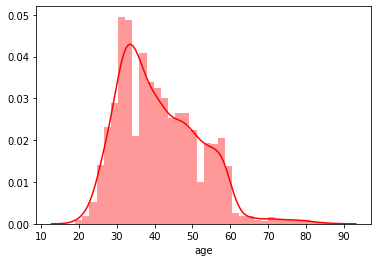

In [217]:
## Distribution of Age
sns.distplot(Client_Data['age'],color='r')

### we see that In our Dataset most people have age between 30 to 50 years

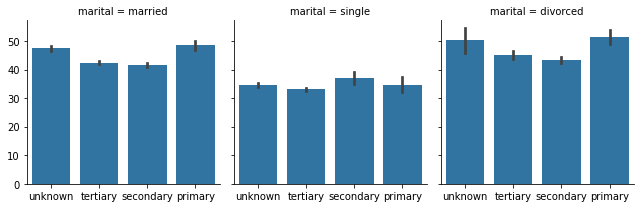

In [218]:
sns.FacetGrid(Client_Data,col='marital').map_dataframe(sns.barplot, x="education", y="age")
plt.tight_layout()

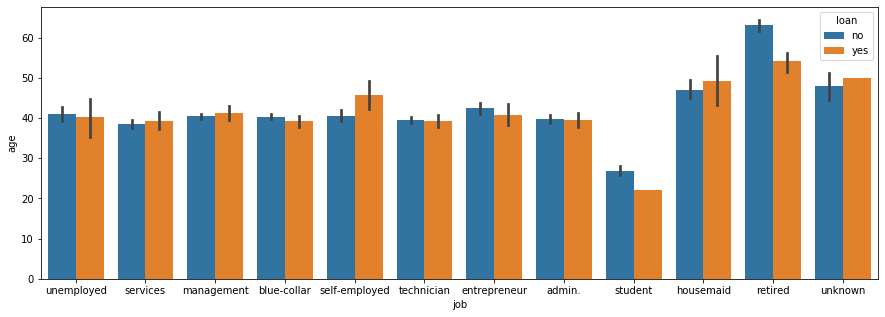

In [219]:
plt.figure(figsize=(15,5))
sns.barplot(x='job',y='age',hue='loan',data=Client_Data)
plt.show()

In [220]:
Client_Data.head()

,age,job,marital,education,default,balance,housing,loan
0,30,unemployed,married,primary,no,1787,no,no
1,33,services,married,secondary,no,4789,yes,yes
2,35,management,single,tertiary,no,1350,yes,no
3,30,management,married,tertiary,no,1476,yes,yes
4,59,blue-collar,married,secondary,no,0,yes,no


In [221]:
def AgeTranform(age_column):
    for i in range(Client_Data[age_column].shape[0]):
        if Client_Data[age_column][i] in range(0,25):
            Client_Data['Age_Interval'][i] = 'Teen'
        elif Client_Data[age_column][i] in range(25,45):
            Client_Data['Age_Interval'][i] = 'Adult'
        else:
            Client_Data['Age_Interval'][i] = 'Old'

In [222]:
Client_Data['Age_Interval'] = 'Null'
AgeTranform('age')

In [223]:
Client_Data.head()

,age,job,marital,education,default,balance,housing,loan,Age_Interval
0,30,unemployed,married,primary,no,1787,no,no,Adult
1,33,services,married,secondary,no,4789,yes,yes,Adult
2,35,management,single,tertiary,no,1350,yes,no,Adult
3,30,management,married,tertiary,no,1476,yes,yes,Adult
4,59,blue-collar,married,secondary,no,0,yes,no,Old


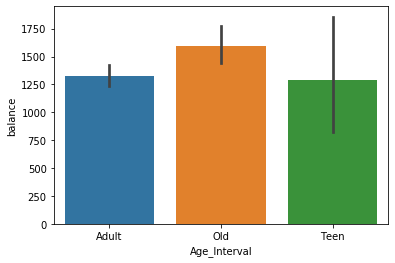

In [224]:
sns.barplot(x='Age_Interval',y='balance',data=Client_Data)
plt.show()

In [225]:
Client_Data['housing'] = Client_Data['housing'].apply(lambda x: 1 if x =='yes' else 0)

#### 

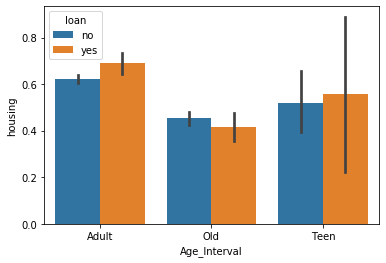

In [226]:
sns.barplot(y='housing',x='Age_Interval',hue='loan',data=Client_Data)

In [227]:
Client_Data.head()

,age,job,marital,education,default,balance,housing,loan,Age_Interval
0,30,unemployed,married,primary,no,1787,0,no,Adult
1,33,services,married,secondary,no,4789,1,yes,Adult
2,35,management,single,tertiary,no,1350,1,no,Adult
3,30,management,married,tertiary,no,1476,1,yes,Adult
4,59,blue-collar,married,secondary,no,0,1,no,Old


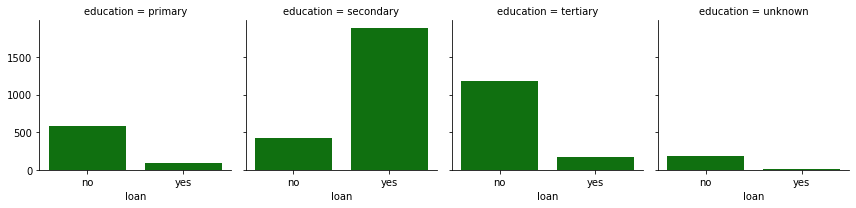

In [228]:
sns.FacetGrid(Client_Data , col='education').map(sns.countplot , 'loan',color='g')
plt.show()

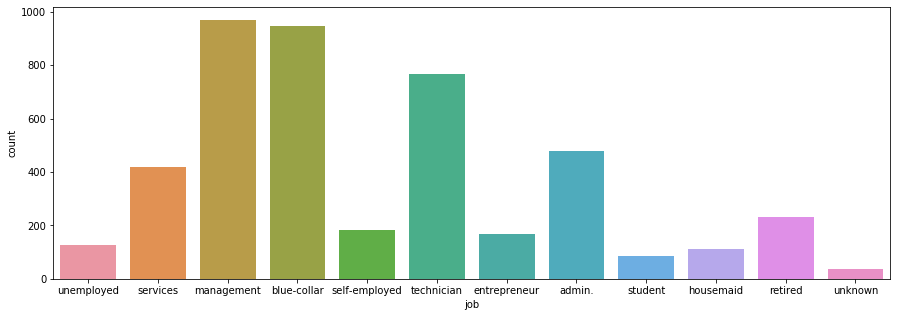

In [229]:
plt.figure(figsize=(15,5))
sns.countplot(Client_Data['job'])

<Figure size 1080x720 with 0 Axes>

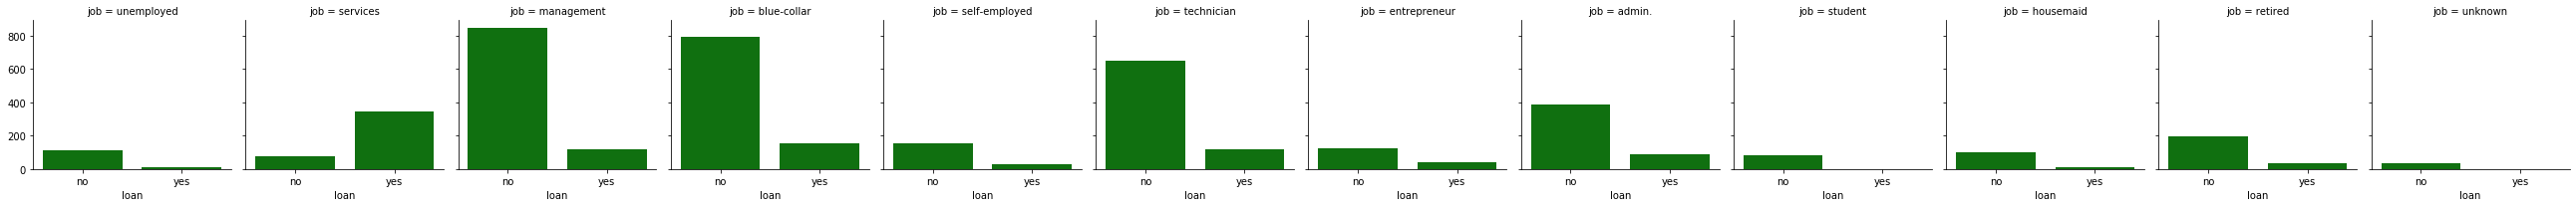

In [230]:
plt.figure(figsize=(15,10))
sns.FacetGrid(Client_Data , col='job').map(sns.countplot , 'loan',color='g')
plt.tight_layout()

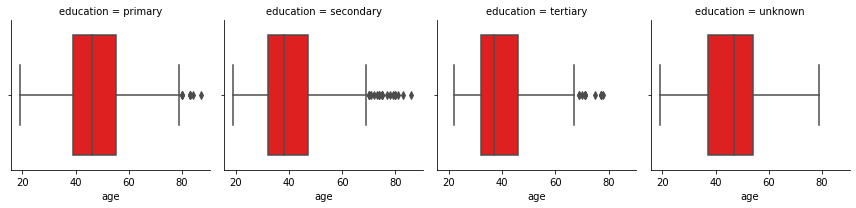

In [231]:
sns.FacetGrid(Client_Data , col='education').map(sns.boxplot , 'age',color='r')
plt.show()

In [232]:
Client_Data.head()

,age,job,marital,education,default,balance,housing,loan,Age_Interval
0,30,unemployed,married,primary,no,1787,0,no,Adult
1,33,services,married,secondary,no,4789,1,yes,Adult
2,35,management,single,tertiary,no,1350,1,no,Adult
3,30,management,married,tertiary,no,1476,1,yes,Adult
4,59,blue-collar,married,secondary,no,0,1,no,Old


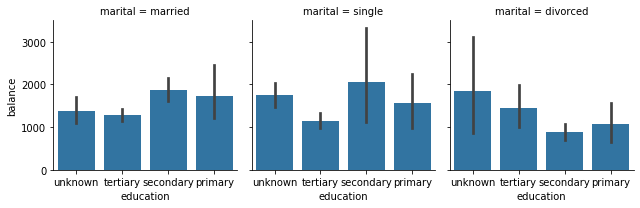

In [233]:
sns.FacetGrid(Client_Data , col = 'marital').map(sns.barplot, 'education', 'balance')
plt.tight_layout()

In [234]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


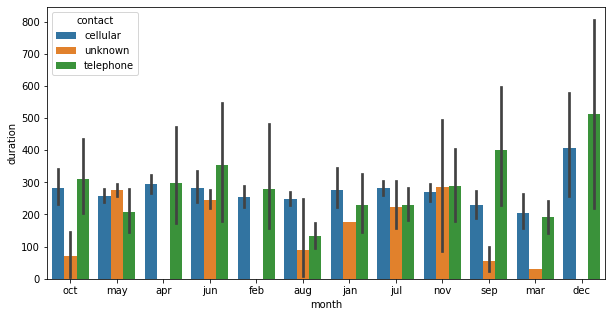

In [235]:
plt.figure(figsize=(10,5))
sns.barplot(x='month' , y= 'duration' ,hue='contact', data = bank)
plt.show()

In [236]:
target = bank['y']

In [237]:
bank['Deposit'] = bank['y'].apply(lambda x: 1 if x =='yes' else 0)

In [238]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0


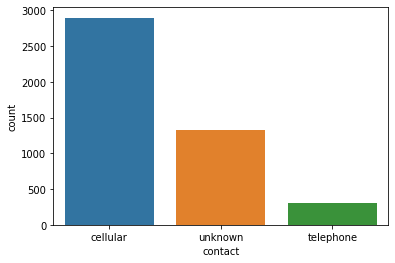

In [239]:
sns.countplot(bank['contact'])

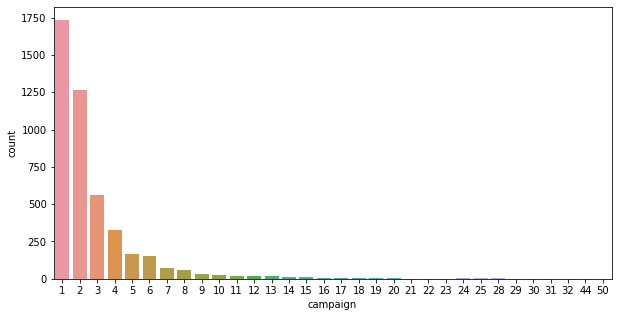

In [240]:
plt.figure(figsize=(10,5))
sns.countplot(bank['campaign'])

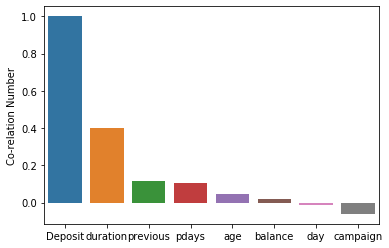

<Figure size 432x288 with 0 Axes>

In [241]:
sns.barplot(x=bank.corrwith(bank['Deposit']).sort_values(ascending=False).index , y=bank.corrwith(bank['Deposit']).sort_values(ascending=False))
plt.ylabel("Co-relation Number")
plt.show()
plt.tight_layout()

#### In this plot we see that Day and comapign has negative correaltion with Deposit

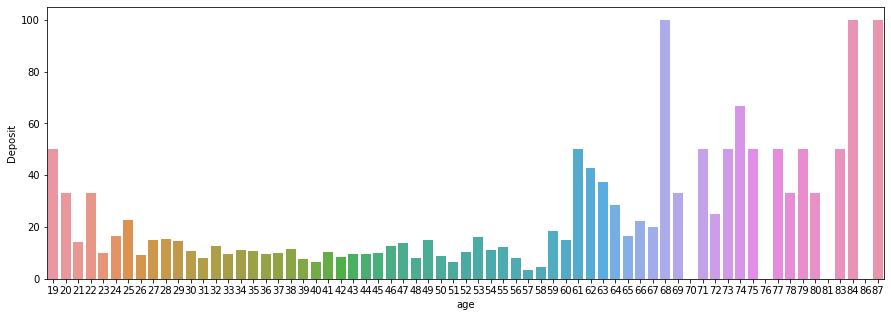

In [242]:
plt.figure(figsize=(15,5))
SuccessRateWithAge = bank.groupby('age')['Deposit'].mean()*100
sns.barplot(x=SuccessRateWithAge.index,y=SuccessRateWithAge )

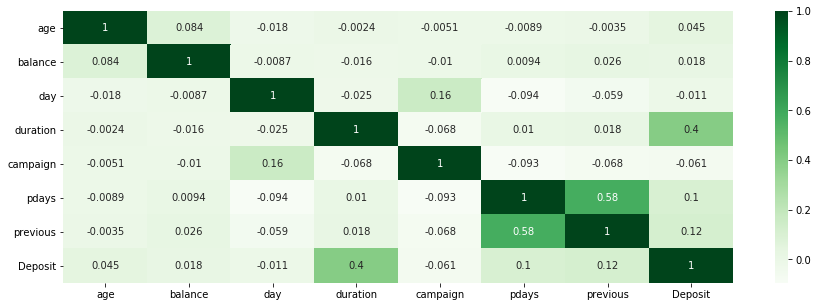

In [243]:
plt.figure(figsize=(15,5))
sns.heatmap(bank.corr(),annot=True,cmap='Greens')

In [244]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0


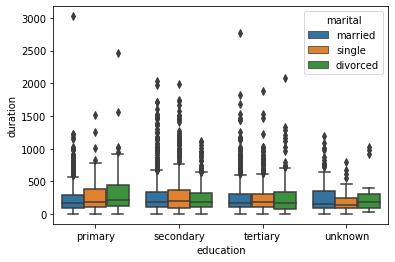

In [245]:
sns.boxplot(hue='marital',y='duration',x ='education',data=bank)


In [246]:
##Transorm feture
#Failure = 0 
#success = 1
#other = -1
# unknown = -1
bank['poutcomesNew'] = bank['poutcome'].apply(lambda x:0 if x == 'failure' else (1 if x=='success' else -1))


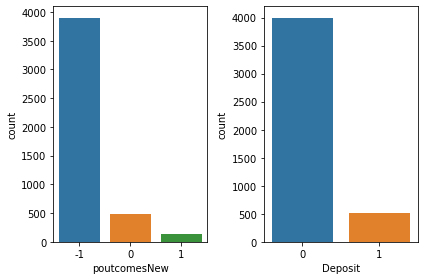

In [247]:
plt.subplots(1,2)
plt.subplot(121)
sns.countplot(x='poutcomesNew',data=bank)
plt.tight_layout()
plt.subplot(122)
sns.countplot(x='Deposit',data=bank)
plt.tight_layout()

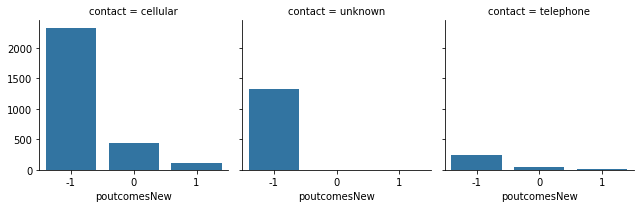

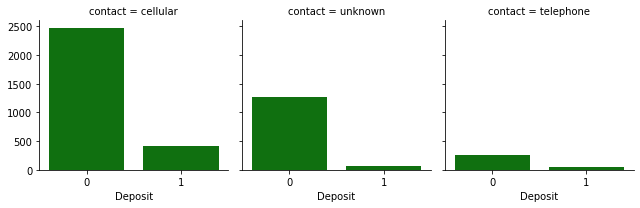

In [248]:
sns.FacetGrid(bank , col = 'contact').map(sns.countplot , 'poutcomesNew')
sns.FacetGrid(bank , col = 'contact').map(sns.countplot , 'Deposit' , color='g')
plt.show()

In [249]:
len(bank['housing'].unique())

2

In [250]:
bank['housing'].unique()[0]

'no'

In [251]:
# Data Preprocessing

In [252]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Deposit,poutcomesNew
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0,-1
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,0,-1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0,-1


In [253]:
bank['housing'] = bank['housing'].apply(lambda x: 1 if x =='yes' else 0)
bank['loan'] = bank['loan'].apply(lambda x: 1 if x =='yes' else 0)
bank['default'] = bank['default'].apply(lambda x: 1 if x =='yes' else 0)

In [254]:
#droppping columns
bank.drop(['day' , 'month' , 'pdays','campaign'] , 1 , inplace=True)
bank.drop(['y', 'poutcomesNew'] , 1 , inplace=True)

In [255]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,previous,poutcome,Deposit
0,30,unemployed,married,primary,0,1787,0,0,cellular,79,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,220,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,185,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,199,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,226,0,unknown,0


In [256]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   int64 
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   int64 
 7   loan       4521 non-null   int64 
 8   contact    4521 non-null   object
 9   duration   4521 non-null   int64 
 10  previous   4521 non-null   int64 
 11  poutcome   4521 non-null   object
 12  Deposit    4521 non-null   int64 
dtypes: int64(8), object(5)
memory usage: 459.3+ KB


In [257]:
bank = bank.loc[bank['education']!='unknown']

In [258]:
catgorical_col = bank.select_dtypes(include ='object')

In [259]:
catgorical_col.head()

,job,marital,education,contact,poutcome
0,unemployed,married,primary,cellular,unknown
1,services,married,secondary,cellular,failure
2,management,single,tertiary,cellular,failure
3,management,married,tertiary,unknown,unknown
4,blue-collar,married,secondary,unknown,unknown


In [260]:
# create dummy set of categorical col
DummyData = pd.DataFrame()
def one_hot(col,data):
    dummy = pd.get_dummies(data[col] ,drop_first=True )
    return dummy

In [261]:
for i in range(catgorical_col.shape[1]):
    dummy1 = one_hot(catgorical_col.columns[i] , bank)
    print(catgorical_col[catgorical_col.columns[i]].unique())
    DummyData = pd.concat([DummyData , dummy1],1)

['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
['married' 'single' 'divorced']
['primary' 'secondary' 'tertiary']
['cellular' 'unknown' 'telephone']
['unknown' 'failure' 'other' 'success']


In [262]:
DummyData.head()

,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,married,single,secondary,tertiary,telephone,unknown,other,success,unknown
0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1


In [263]:
#Rename of unknown_col
DummyData['cellular'] = DummyData.iloc[:,16]

In [264]:
DummyData['failure'] = DummyData.iloc[:,19]

In [265]:
DummyData.drop([DummyData.columns[16],DummyData.columns[19]], 1 ,inplace =True)

In [266]:
DummyData.head()

,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,married,single,secondary,tertiary,telephone,other,success,cellular,failure
0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1
4,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1


In [267]:
Numerical_col = bank.select_dtypes(exclude = 'object')

In [268]:
Numerical_col.head()

,age,default,balance,housing,loan,duration,previous,Deposit
0,30,0,1787,0,0,79,0,0
1,33,0,4789,1,1,220,4,0
2,35,0,1350,1,0,185,1,0
3,30,0,1476,1,1,199,0,0
4,59,0,0,1,0,226,0,0


In [269]:
def Normalize_data(col , data):
    data[col] = data[col].apply(lambda x : ((x - data[col].mean()))/data[col].std())

In [270]:
Normalize_data('age' , Numerical_col)

In [271]:
Normalize_data('balance' , Numerical_col)
Normalize_data('duration' , Numerical_col)

In [272]:
Numerical_col.head()

,age,default,balance,housing,loan,duration,previous,Deposit
0,-1.046314,0,0.125012,0,0,-0.711874,0,0
1,-0.760746,0,1.122151,1,1,-0.170902,4,0
2,-0.570367,0,-0.020141,1,0,-0.305186,1,0
3,-1.046314,0,0.021711,1,1,-0.251472,0,0
4,1.714177,0,-0.468555,1,0,-0.147882,0,0


In [273]:
Bank_data = pd.concat([DummyData , Numerical_col] , 1)

In [274]:
Bank_data.head()

,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,...,cellular,failure,age,default,balance,housing,loan,duration,previous,Deposit
0,0,0,0,0,0,0,0,0,0,1,...,0,1,-1.046314,0,0.125012,0,0,-0.711874,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,-0.760746,0,1.122151,1,1,-0.170902,4,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,-0.570367,0,-0.020141,1,0,-0.305186,1,0
3,0,0,0,1,0,0,0,0,0,0,...,1,1,-1.046314,0,0.021711,1,1,-0.251472,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,1,1.714177,0,-0.468555,1,0,-0.147882,0,0


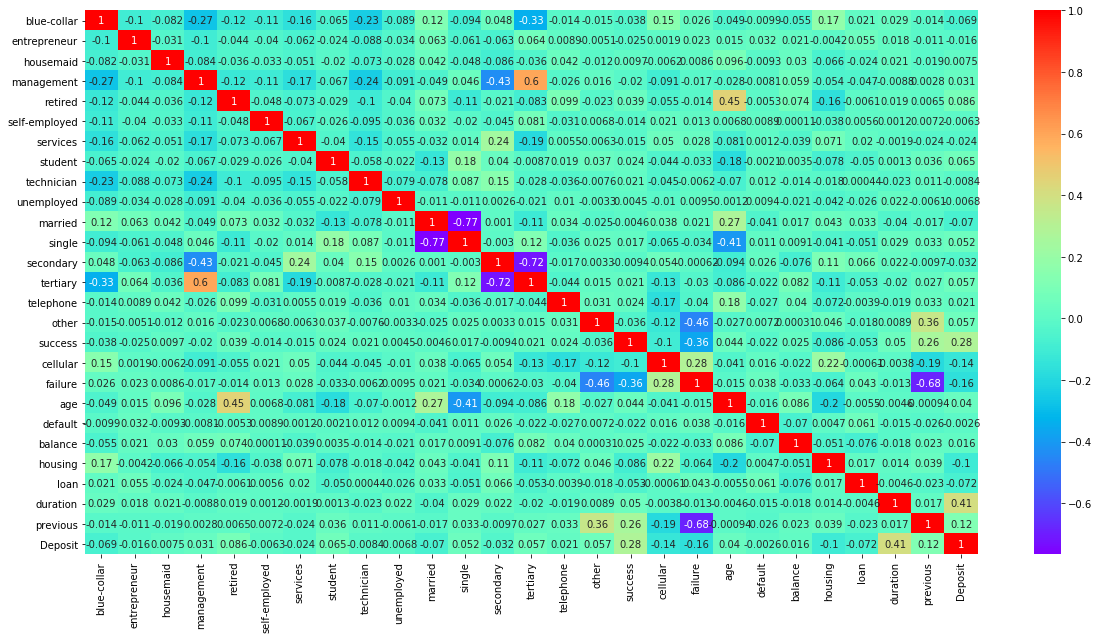

In [275]:
plt.figure(figsize = (20,10))  # Size of the figure
sns.heatmap(Bank_data.corr(),annot = True,cmap='rainbow')
plt.show()

In [276]:
# splitting

In [298]:
X = Bank_data.iloc[:,:-1]
Y = Bank_data['Deposit']

In [299]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [300]:
%%markdown
#### Model Building

#### Model Building


In [301]:
import statsmodels.api as sm

In [302]:
Log1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
Log1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Deposit   No. Observations:                 3033
Model:                            GLM   Df Residuals:                     3006
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -752.13
Date:                Sun, 20 Sep 2020   Deviance:                       1504.3
Time:                        23:32:45   Pearson chi2:                 2.40e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.3777      0.423     -3.258      0.001      -2.206      -0.549
blue-collar      -0.3858      0.278     -1.387      0.166      -0.931       0.160
entrepreneur     -0.6060      0.441     -1.373      0.170      -1.471       0.259
housemaid        -0.6854      0.507     -1.353      0.176      -1.679       0.308
management       -0.4048      0.277     -1.462      0.144      -0.947       0.138
retired           0.7134      0.358      1.994      0.046       0.012       1.415
self-employed    -0.8212      0.417     -1.970      0.049      -1.638      -0.004
services         -0.1779      0.314     -0.567      0.571      -0.793       0.438
student           0.3453      0.429      0.805      0.421      -0.495       1.186
technician       -0.4477      0.262     -1.712      0.087      -0.960       0.065
unemployed       -0.9907      0.522     -1.898      0.058      -2.014       0.032
married          -0.6271      0.202     -3.101      0.002      -1.023      -0.231
single           -0.5147      0.239     -2.157      0.031      -0.982      -0.047
secondary         0.1545      0.246      0.627      0.531      -0.328       0.637
tertiary          0.7019      0.285      2.466      0.014       0.144       1.260
telephone        -0.0531      0.276     -0.192      0.848      -0.594       0.488
other             0.7295      0.308      2.366      0.018       0.125       1.334
success           2.5557      0.314      8.139      0.000       1.940       3.171
cellular         -1.2372      0.229     -5.393      0.000      -1.687      -0.788
failure          -0.2049      0.254     -0.806      0.421      -0.704       0.294
age              -0.1301      0.090     -1.448      0.148      -0.306       0.046
default           0.1685      0.555      0.303      0.762      -0.920       1.257
balance          -0.0276      0.071     -0.388      0.698      -0.167       0.112
housing          -0.5543      0.152     -3.657      0.000      -0.851      -0.257
loan             -0.7237      0.232     -3.115      0.002      -1.179      -0.268
duration          1.0777      0.064     16.910      0.000       0.953       1.203
previous          0.0033      0.044      0.076      0.940      -0.083       0.090
=================================================================================
"""

In [303]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X_train,y_train)

LogisticRegression()

In [304]:
lm.score(X_train,y_train)

0.9043850972634355

In [305]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=lm, step=1, cv=3)
rfecv.fit(X_train, y_train)
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 22


In [306]:
from sklearn.feature_selection import RFE
lm = LogisticRegression()
rfe1 = RFE(lm, 22)
rfe1.fit(X_train, y_train)
print(rfe1.support_)           
print(rfe1.ranking_)  

[ True  True  True  True  True  True False  True  True  True  True  True
  True  True False  True  True  True  True  True  True False  True  True
  True False]
[1 1 1 1 1 1 2 1 1 1 1 1 1 1 3 1 1 1 1 1 1 4 1 1 1 5]


In [307]:
rfe1.support_

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False])

In [308]:
col = X_train.columns[rfe1.support_]

In [309]:
X_train_sm = sm.add_constant(X_train[col])
Log2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = Log2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Deposit   No. Observations:                 3033
Model:                            GLM   Df Residuals:                     3010
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -752.40
Date:                Sun, 20 Sep 2020   Deviance:                       1504.8
Time:                        23:32:50   Pearson chi2:                 2.41e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.4353      0.382     -3.758      0.000      -2.184      -0.687
blue-collar      -0.3132      0.248     -1.261      0.207      -0.800       0.174
entrepreneur     -0.5442      0.425     -1.279      0.201      -1.378       0.290
housemaid        -0.6312      0.493     -1.281      0.200      -1.597       0.334
management       -0.3430      0.254     -1.350      0.177      -0.841       0.155
retired           0.7767      0.339      2.291      0.022       0.112       1.441
self-employed    -0.7557      0.401     -1.885      0.059      -1.541       0.030
student           0.4080      0.411      0.994      0.320      -0.397       1.213
technician       -0.3798      0.234     -1.625      0.104      -0.838       0.078
unemployed       -0.9232      0.508     -1.815      0.069      -1.920       0.073
married          -0.6357      0.202     -3.152      0.002      -1.031      -0.240
single           -0.5263      0.238     -2.215      0.027      -0.992      -0.061
secondary         0.1537      0.246      0.624      0.532      -0.329       0.636
tertiary          0.7095      0.284      2.499      0.012       0.153       1.266
other             0.7320      0.308      2.378      0.017       0.129       1.335
success           2.5680      0.314      8.188      0.000       1.953       3.183
cellular         -1.2362      0.228     -5.410      0.000      -1.684      -0.788
failure          -0.2139      0.216     -0.989      0.323      -0.638       0.210
age              -0.1344      0.088     -1.522      0.128      -0.307       0.039
default           0.1819      0.554      0.328      0.743      -0.904       1.268
housing          -0.5565      0.152     -3.673      0.000      -0.853      -0.260
loan             -0.7168      0.232     -3.092      0.002      -1.171      -0.262
duration          1.0783      0.064     16.929      0.000       0.953       1.203
=================================================================================
"""

In [310]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,failure,6.61
9,married,5.04
12,tertiary,4.13
11,secondary,4.06
10,single,2.98
3,management,2.93
19,housing,2.56
0,blue-collar,1.95
7,technician,1.81
15,cellular,1.66


In [311]:
col = col.drop('failure',1)

In [312]:
X_train_sm = sm.add_constant(X_train[col])
Log3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = Log3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Deposit   No. Observations:                 3033
Model:                            GLM   Df Residuals:                     3011
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -752.88
Date:                Sun, 20 Sep 2020   Deviance:                       1505.8
Time:                        23:32:53   Pearson chi2:                 2.41e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.6308      0.328     -4.975      0.000      -2.273      -0.988
blue-collar      -0.3100      0.248     -1.248      0.212      -0.797       0.177
entrepreneur     -0.5553      0.426     -1.304      0.192      -1.390       0.279
housemaid        -0.6091      0.491     -1.241      0.215      -1.571       0.353
management       -0.3424      0.254     -1.346      0.178      -0.841       0.156
retired           0.7789      0.339      2.300      0.021       0.115       1.443
self-employed    -0.7653      0.401     -1.908      0.056      -1.552       0.021
student           0.4175      0.411      1.015      0.310      -0.389       1.224
technician       -0.3760      0.234     -1.608      0.108      -0.834       0.082
unemployed       -0.9357      0.508     -1.841      0.066      -1.932       0.061
married          -0.6345      0.202     -3.147      0.002      -1.030      -0.239
single           -0.5194      0.238     -2.187      0.029      -0.985      -0.054
secondary         0.1600      0.246      0.650      0.516      -0.323       0.643
tertiary          0.7139      0.284      2.511      0.012       0.157       1.271
other             0.9082      0.253      3.597      0.000       0.413       1.403
success           2.7452      0.259     10.608      0.000       2.238       3.252
cellular         -1.2735      0.225     -5.658      0.000      -1.715      -0.832
age              -0.1296      0.088     -1.471      0.141      -0.302       0.043
default           0.1609      0.553      0.291      0.771      -0.924       1.246
housing          -0.5340      0.150     -3.569      0.000      -0.827      -0.241
loan             -0.7230      0.232     -3.116      0.002      -1.178      -0.268
duration          1.0768      0.064     16.928      0.000       0.952       1.202
=================================================================================
"""

In [313]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,married,4.50
12,tertiary,3.87
11,secondary,3.56
3,management,2.85
10,single,2.75
18,housing,2.56
0,blue-collar,1.83
7,technician,1.77
16,age,1.58
15,cellular,1.50


In [314]:
col = col.drop('default',1)

In [315]:
X_train_sm = sm.add_constant(X_train[col])
Log3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = Log3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Deposit   No. Observations:                 3033
Model:                            GLM   Df Residuals:                     3012
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -752.92
Date:                Sun, 20 Sep 2020   Deviance:                       1505.8
Time:                        23:32:55   Pearson chi2:                 2.41e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.6298      0.328     -4.973      0.000      -2.272      -0.987
blue-collar      -0.3081      0.248     -1.241      0.215      -0.795       0.178
entrepreneur     -0.5482      0.425     -1.291      0.197      -1.381       0.284
housemaid        -0.6047      0.490     -1.235      0.217      -1.565       0.355
management       -0.3405      0.254     -1.339      0.181      -0.839       0.158
retired           0.7801      0.339      2.303      0.021       0.116       1.444
self-employed    -0.7643      0.401     -1.905      0.057      -1.551       0.022
student           0.4196      0.411      1.020      0.308      -0.387       1.226
technician       -0.3743      0.234     -1.601      0.109      -0.832       0.084
unemployed       -0.9345      0.508     -1.838      0.066      -1.931       0.062
married          -0.6371      0.201     -3.165      0.002      -1.032      -0.243
single           -0.5205      0.238     -2.191      0.028      -0.986      -0.055
secondary         0.1616      0.246      0.657      0.511      -0.321       0.644
tertiary          0.7135      0.284      2.510      0.012       0.156       1.271
other             0.9115      0.252      3.615      0.000       0.417       1.406
success           2.7433      0.259     10.606      0.000       2.236       3.250
cellular         -1.2731      0.225     -5.657      0.000      -1.714      -0.832
age              -0.1294      0.088     -1.468      0.142      -0.302       0.043
housing          -0.5326      0.150     -3.561      0.000      -0.826      -0.239
loan             -0.7221      0.232     -3.111      0.002      -1.177      -0.267
duration          1.0766      0.064     16.930      0.000       0.952       1.201
=================================================================================
"""

In [316]:
col = col.drop('management' , 1)
X_train_sm = sm.add_constant(X_train[col])
Log6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = Log6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Deposit   No. Observations:                 3033
Model:                            GLM   Df Residuals:                     3013
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -753.81
Date:                Sun, 20 Sep 2020   Deviance:                       1507.6
Time:                        23:32:56   Pearson chi2:                 2.41e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.7646      0.313     -5.640      0.000      -2.378      -1.151
blue-collar      -0.1860      0.233     -0.799      0.424      -0.642       0.270
entrepreneur     -0.3536      0.400     -0.883      0.377      -1.138       0.431
housemaid        -0.4365      0.474     -0.920      0.358      -1.366       0.493
retired           0.9399      0.318      2.954      0.003       0.316       1.563
self-employed    -0.5547      0.370     -1.501      0.133      -1.279       0.170
student           0.5679      0.396      1.435      0.151      -0.208       1.344
technician       -0.2102      0.201     -1.048      0.295      -0.603       0.183
unemployed       -0.7572      0.492     -1.538      0.124      -1.722       0.208
married          -0.6457      0.201     -3.214      0.001      -1.039      -0.252
single           -0.5151      0.237     -2.174      0.030      -0.980      -0.051
secondary         0.1870      0.245      0.763      0.446      -0.293       0.667
tertiary          0.5874      0.268      2.191      0.028       0.062       1.113
other             0.9129      0.252      3.619      0.000       0.418       1.407
success           2.7741      0.258     10.770      0.000       2.269       3.279
cellular         -1.2653      0.225     -5.632      0.000      -1.706      -0.825
age              -0.1350      0.088     -1.534      0.125      -0.308       0.038
housing          -0.5309      0.149     -3.552      0.000      -0.824      -0.238
loan             -0.7169      0.232     -3.092      0.002      -1.171      -0.263
duration          1.0724      0.063     16.909      0.000       0.948       1.197
=================================================================================
"""

In [317]:
col = col.drop('secondary' , 1)
X_train_sm = sm.add_constant(X_train[col])
Log5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = Log5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Deposit   No. Observations:                 3033
Model:                            GLM   Df Residuals:                     3014
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -754.11
Date:                Sun, 20 Sep 2020   Deviance:                       1508.2
Time:                        23:32:58   Pearson chi2:                 2.41e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.6039      0.230     -6.960      0.000      -2.056      -1.152
blue-collar      -0.2355      0.224     -1.051      0.293      -0.675       0.204
entrepreneur     -0.3649      0.400     -0.912      0.362      -1.149       0.419
housemaid        -0.4917      0.469     -1.049      0.294      -1.410       0.427
retired           0.9116      0.316      2.886      0.004       0.292       1.531
self-employed    -0.5535      0.369     -1.499      0.134      -1.277       0.170
student           0.5643      0.396      1.425      0.154      -0.212       1.340
technician       -0.2026      0.200     -1.011      0.312      -0.595       0.190
unemployed       -0.7807      0.492     -1.586      0.113      -1.745       0.184
married          -0.6424      0.201     -3.199      0.001      -1.036      -0.249
single           -0.5079      0.237     -2.144      0.032      -0.972      -0.044
tertiary          0.4212      0.155      2.720      0.007       0.118       0.725
other             0.9149      0.252      3.630      0.000       0.421       1.409
success           2.7716      0.258     10.758      0.000       2.267       3.277
cellular         -1.2664      0.225     -5.641      0.000      -1.707      -0.826
age              -0.1422      0.088     -1.625      0.104      -0.314       0.029
housing          -0.5286      0.149     -3.537      0.000      -0.821      -0.236
loan             -0.7066      0.231     -3.054      0.002      -1.160      -0.253
duration          1.0744      0.063     16.956      0.000       0.950       1.199
=================================================================================
"""

In [318]:
col = col.drop('entrepreneur' , 1)
X_train_sm = sm.add_constant(X_train[col])
Log7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = Log7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Deposit   No. Observations:                 3033
Model:                            GLM   Df Residuals:                     3015
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -754.55
Date:                Sun, 20 Sep 2020   Deviance:                       1509.1
Time:                        23:32:59   Pearson chi2:                 2.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.6325      0.229     -7.140      0.000      -2.081      -1.184
blue-collar      -0.2076      0.222     -0.934      0.350      -0.643       0.228
housemaid        -0.4634      0.468     -0.991      0.322      -1.380       0.454
retired           0.9481      0.314      3.022      0.003       0.333       1.563
self-employed    -0.5273      0.368     -1.432      0.152      -1.249       0.194
student           0.5818      0.396      1.471      0.141      -0.193       1.357
technician       -0.1774      0.199     -0.892      0.372      -0.567       0.212
unemployed       -0.7543      0.491     -1.535      0.125      -1.717       0.209
married          -0.6433      0.201     -3.202      0.001      -1.037      -0.250
single           -0.5037      0.237     -2.125      0.034      -0.968      -0.039
tertiary          0.4232      0.155      2.734      0.006       0.120       0.727
other             0.9202      0.252      3.652      0.000       0.426       1.414
success           2.7786      0.257     10.797      0.000       2.274       3.283
cellular         -1.2617      0.224     -5.628      0.000      -1.701      -0.822
age              -0.1457      0.088     -1.665      0.096      -0.317       0.026
housing          -0.5270      0.149     -3.528      0.000      -0.820      -0.234
loan             -0.7171      0.231     -3.101      0.002      -1.170      -0.264
duration          1.0724      0.063     16.953      0.000       0.948       1.196
=================================================================================
"""

In [319]:
col = col.drop('technician' , 1)
X_train_sm = sm.add_constant(X_train[col])
Log8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = Log8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Deposit   No. Observations:                 3033
Model:                            GLM   Df Residuals:                     3016
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -754.95
Date:                Sun, 20 Sep 2020   Deviance:                       1509.9
Time:                        23:33:01   Pearson chi2:                 2.41e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.6876      0.220     -7.659      0.000      -2.119      -1.256
blue-collar      -0.1535      0.214     -0.716      0.474      -0.574       0.267
housemaid        -0.4110      0.464     -0.886      0.376      -1.320       0.499
retired           1.0006      0.309      3.242      0.001       0.396       1.606
self-employed    -0.4839      0.365     -1.326      0.185      -1.199       0.232
student           0.6434      0.390      1.650      0.099      -0.121       1.408
unemployed       -0.7045      0.488     -1.444      0.149      -1.661       0.252
married          -0.6421      0.201     -3.200      0.001      -1.035      -0.249
single           -0.5218      0.236     -2.210      0.027      -0.984      -0.059
tertiary          0.4456      0.153      2.915      0.004       0.146       0.745
other             0.9250      0.252      3.673      0.000       0.431       1.418
success           2.7678      0.257     10.770      0.000       2.264       3.271
cellular         -1.2574      0.224     -5.608      0.000      -1.697      -0.818
age              -0.1469      0.088     -1.677      0.094      -0.319       0.025
housing          -0.5251      0.149     -3.517      0.000      -0.818      -0.232
loan             -0.7074      0.230     -3.070      0.002      -1.159      -0.256
duration          1.0732      0.063     16.964      0.000       0.949       1.197
=================================================================================
"""

In [320]:
col = col.drop('blue-collar' , 1)
X_train_sm = sm.add_constant(X_train[col])
Log9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = Log9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Deposit   No. Observations:                 3033
Model:                            GLM   Df Residuals:                     3017
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -755.21
Date:                Sun, 20 Sep 2020   Deviance:                       1510.4
Time:                        23:33:01   Pearson chi2:                 2.41e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.7185      0.217     -7.932      0.000      -2.143      -1.294
housemaid        -0.3803      0.462     -0.823      0.411      -1.286       0.526
retired           1.0341      0.305      3.385      0.001       0.435       1.633
self-employed    -0.4638      0.364     -1.274      0.203      -1.177       0.250
student           0.6672      0.389      1.715      0.086      -0.095       1.430
unemployed       -0.6764      0.486     -1.391      0.164      -1.630       0.277
married          -0.6508      0.200     -3.248      0.001      -1.044      -0.258
single           -0.5229      0.236     -2.213      0.027      -0.986      -0.060
tertiary          0.4821      0.145      3.331      0.001       0.198       0.766
other             0.9245      0.252      3.670      0.000       0.431       1.418
success           2.7662      0.257     10.777      0.000       2.263       3.269
cellular         -1.2665      0.224     -5.657      0.000      -1.705      -0.828
age              -0.1466      0.088     -1.673      0.094      -0.318       0.025
housing          -0.5366      0.149     -3.611      0.000      -0.828      -0.245
loan             -0.7106      0.230     -3.084      0.002      -1.162      -0.259
duration          1.0716      0.063     16.970      0.000       0.948       1.195
=================================================================================
"""

In [321]:
col = col.drop('housemaid' , 1)
X_train_sm = sm.add_constant(X_train[col])
Log10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = Log10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Deposit   No. Observations:                 3033
Model:                            GLM   Df Residuals:                     3018
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -755.57
Date:                Sun, 20 Sep 2020   Deviance:                       1511.1
Time:                        23:33:02   Pearson chi2:                 2.41e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.7381      0.216     -8.057      0.000      -2.161      -1.315
retired           1.0618      0.304      3.498      0.000       0.467       1.657
self-employed    -0.4504      0.363     -1.239      0.215      -1.163       0.262
student           0.6743      0.389      1.734      0.083      -0.088       1.437
unemployed       -0.6620      0.486     -1.363      0.173      -1.614       0.290
married          -0.6494      0.201     -3.238      0.001      -1.042      -0.256
single           -0.5212      0.236     -2.205      0.027      -0.984      -0.058
tertiary          0.4869      0.145      3.368      0.001       0.204       0.770
other             0.9284      0.252      3.689      0.000       0.435       1.422
success           2.7577      0.256     10.770      0.000       2.256       3.259
cellular         -1.2676      0.224     -5.657      0.000      -1.707      -0.828
age              -0.1517      0.087     -1.737      0.082      -0.323       0.020
housing          -0.5279      0.148     -3.564      0.000      -0.818      -0.238
loan             -0.7000      0.230     -3.045      0.002      -1.151      -0.249
duration          1.0698      0.063     16.960      0.000       0.946       1.193
=================================================================================
"""

In [322]:
col = col.drop('self-employed' , 1)
X_train_sm = sm.add_constant(X_train[col])
Log11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = Log11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Deposit   No. Observations:                 3033
Model:                            GLM   Df Residuals:                     3019
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -756.40
Date:                Sun, 20 Sep 2020   Deviance:                       1512.8
Time:                        23:33:03   Pearson chi2:                 2.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7510      0.216     -8.121      0.000      -2.174      -1.328
retired        1.0877      0.303      3.593      0.000       0.494       1.681
student        0.6931      0.388      1.785      0.074      -0.068       1.454
unemployed    -0.6385      0.485     -1.316      0.188      -1.589       0.312
married       -0.6539      0.200     -3.263      0.001      -1.047      -0.261
single        -0.5233      0.236     -2.214      0.027      -0.987      -0.060
tertiary       0.4689      0.144      3.258      0.001       0.187       0.751
other          0.9155      0.251      3.647      0.000       0.423       1.408
success        2.7562      0.255     10.790      0.000       2.256       3.257
cellular      -1.2817      0.224     -5.719      0.000      -1.721      -0.842
age           -0.1542      0.087     -1.766      0.077      -0.325       0.017
housing       -0.5176      0.148     -3.500      0.000      -0.807      -0.228
loan          -0.6911      0.229     -3.012      0.003      -1.141      -0.241
duration       1.0661      0.063     16.949      0.000       0.943       1.189
==============================================================================
"""

In [323]:
col = col.drop('unemployed' , 1)
X_train_sm = sm.add_constant(X_train[col])
Log12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = Log12.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Deposit   No. Observations:                 3033
Model:                            GLM   Df Residuals:                     3020
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -757.37
Date:                Sun, 20 Sep 2020   Deviance:                       1514.7
Time:                        23:33:04   Pearson chi2:                 2.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7773      0.214     -8.288      0.000      -2.198      -1.357
retired        1.1058      0.302      3.659      0.000       0.513       1.698
student        0.7130      0.388      1.837      0.066      -0.048       1.474
married       -0.6493      0.200     -3.244      0.001      -1.042      -0.257
single        -0.5180      0.236     -2.194      0.028      -0.981      -0.055
tertiary       0.4706      0.144      3.273      0.001       0.189       0.752
other          0.9255      0.251      3.693      0.000       0.434       1.417
success        2.7568      0.256     10.782      0.000       2.256       3.258
cellular      -1.2777      0.224     -5.712      0.000      -1.716      -0.839
age           -0.1527      0.087     -1.753      0.080      -0.324       0.018
housing       -0.5126      0.148     -3.470      0.001      -0.802      -0.223
loan          -0.6764      0.229     -2.956      0.003      -1.125      -0.228
duration       1.0630      0.063     16.968      0.000       0.940       1.186
==============================================================================
"""

In [324]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,married,2.41
9,housing,2.35
3,single,1.76
8,age,1.53
7,cellular,1.47
4,tertiary,1.42
0,retired,1.33
10,loan,1.16
1,student,1.09
5,other,1.07


In [325]:
from sklearn.linear_model import LogisticRegression
lm1 = LogisticRegression()
lm1.fit(X_train,y_train)

LogisticRegression()

In [326]:
lm1.score(X_train,y_train)

0.9043850972634355

In [327]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [328]:
y_train_pred[:10]

array([0.03223896, 0.01476178, 0.05045955, 0.00920297, 0.0949218 ,
       0.02361734, 0.04679555, 0.05647782, 0.25533404, 0.00825565])

In [329]:
y_train_pred_final = pd.DataFrame({'Deposit':y_train.values, 'Deposit_Prob':y_train_pred})
y_train_pred_final.head()

,Deposit,Deposit_Prob
0,0,0.032239
1,0,0.014762
2,0,0.050460
3,0,0.009203
4,0,0.094922


In [330]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Deposit_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Deposit,Deposit_Prob,predicted
0,0,0.032239,0
1,0,0.014762,0
2,0,0.050460,0
3,0,0.009203,0
4,0,0.094922,0


In [331]:
y_train_pred_final['Deposit'].value_counts(),y_train_pred_final['predicted'].value_counts()


(0    2685
 1     348
 Name: Deposit, dtype: int64,
 0    2871
 1     162
 Name: predicted, dtype: int64)

In [332]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score
confusion = confusion_matrix(y_train_pred_final.Deposit,y_train_pred_final.predicted)

In [333]:
confusion

array([[2630,   55],
       [ 241,  107]], dtype=int64)

In [334]:

#### Predicted     not_deposit    Depsit
#### Actual
#### not_deposit        2630      55
#### Deposit          241       107  

In [335]:
accuracy = accuracy_score(y_train_pred_final.Deposit,y_train_pred_final.predicted)
print(accuracy)

0.9024068578964721


In [336]:
accuracy = accuracy_score(y_train_pred_final.Deposit,y_train_pred_final.predicted)
print(accuracy)

0.9024068578964721


In [337]:
%%markdown
## Confusion Matrix

## Confusion Matrix


In [338]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [339]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.3074712643678161

In [340]:
# Let us calculate specificity
TN / float(TN+FP)

0.9795158286778398

In [341]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.020484171322160148


In [342]:
# positive predictive value 
print (TP / float(TP+FP))

0.6604938271604939


In [343]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9160571229536747


In [344]:
%%markdown
## ROC CURVE

## ROC CURVE


In [345]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [346]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Deposit, y_train_pred_final.Deposit_Prob, drop_intermediate = False )

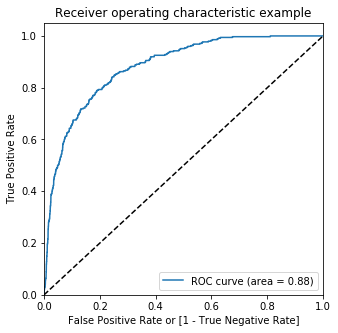

In [347]:
draw_roc(y_train_pred_final.Deposit, y_train_pred_final.Deposit_Prob)

## Finding Optimal CutOFF

In [348]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Deposit_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Deposit,Deposit_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.032239,0,1,0,0,0,0,0,0,0,0,0
1,0,0.014762,0,1,0,0,0,0,0,0,0,0,0
2,0,0.050460,0,1,0,0,0,0,0,0,0,0,0
3,0,0.009203,0,1,0,0,0,0,0,0,0,0,0
4,0,0.094922,0,1,0,0,0,0,0,0,0,0,0


In [349]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = confusion_matrix(y_train_pred_final.Deposit, y_train_pred_final[i] )
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.114738     1.000000     0.000000
0.1          0.1  0.796241     0.793103     0.796648
0.2          0.2  0.883943     0.626437     0.917318
0.3          0.3  0.897132     0.502874     0.948231
0.4          0.4  0.905045     0.410920     0.969088
0.5          0.5  0.902407     0.307471     0.979516
0.6          0.6  0.900429     0.244253     0.985475
0.7          0.7  0.894164     0.163793     0.988827
0.8          0.8  0.888889     0.091954     0.992179
0.9          0.9  0.886251     0.040230     0.995903


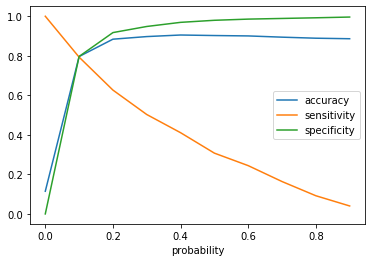

In [350]:
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

#### From the curve above, 0.1 is the optimum point to take it as a cutoff probability.

In [351]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Deposit_Prob'].map( lambda x: 1 if x > 0.1 else 0)
y_train_pred_final.head()

,Deposit,Deposit_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.032239,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.014762,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.050460,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.009203,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.094922,0,1,0,0,0,0,0,0,0,0,0,0


In [352]:
accuracy = accuracy_score(y_train_pred_final.Deposit,y_train_pred_final.final_predicted)
print(accuracy)

0.7962413452027696


In [353]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [354]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.3074712643678161

In [355]:
# Let us calculate specificity
TN / float(TN+FP)

0.9795158286778398

In [356]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.020484171322160148


In [357]:
# positive predictive value 
print (TP / float(TP+FP))

0.6604938271604939


In [358]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9160571229536747


In [359]:
%%markdown
## Precision Recall F1 score

## Precision Recall F1 score


In [360]:
from sklearn.metrics import precision_recall_curve,f1_score,precision_score,recall_score

In [361]:
prescion_score=precision_score(y_train_pred_final.Deposit, y_train_pred_final.final_predicted)
Recall = recall_score(y_train_pred_final.Deposit, y_train_pred_final.final_predicted)
f1_score(y_train_pred_final.Deposit, y_train_pred_final.final_predicted,average=None)

array([0.87377451, 0.47179487])

In [362]:
print(prescion_score)
print(Recall)

0.3357664233576642
0.7931034482758621


### Precision and recall tradeoff

In [363]:
y_train_pred_final.Deposit, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 3028    0
 3029    0
 3030    0
 3031    0
 3032    0
 Name: Deposit, Length: 3033, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 3028    0
 3029    1
 3030    0
 3031    0
 3032    0
 Name: final_predicted, Length: 3033, dtype: int64)

In [364]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Deposit, y_train_pred_final.Deposit_Prob)

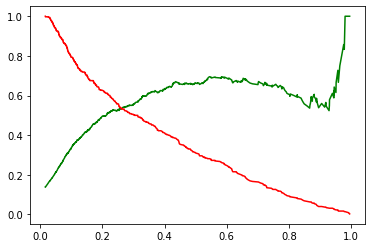

In [365]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [366]:
X_test = X_test[col]
X_test.head()

,retired,student,married,single,tertiary,other,success,cellular,age,housing,loan,duration
3292,0,0,0,1,1,0,0,0,-1.236693,0,0,-0.723384
3414,0,0,0,1,0,0,0,0,-0.284799,0,0,-0.439470
3465,0,0,1,0,0,0,0,1,-0.284799,1,0,-0.458653
2988,0,0,0,1,0,0,0,0,-0.284799,0,0,-0.159392
576,0,0,1,0,0,0,0,0,0.286337,1,1,-0.397266


In [367]:
X_test_sm = sm.add_constant(X_test)

In [368]:
y_pred = res.predict(X_test_sm)

In [369]:
y_pred[:10]

3292    0.082816
3414    0.061869
3465    0.009369
2988    0.081574
576     0.016601
974     0.118412
2869    0.030067
1586    0.065548
372     0.053153
1257    0.004971
dtype: float64

In [370]:
# Converting y_pred to a dataframe which is an array
y_pred = pd.DataFrame(y_pred)

In [371]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [372]:
# Appending y_test_df and y_pred_1
y_pred = pd.concat([y_test_df, y_pred_1],axis=1)

In [373]:
y_pred.head()

,Deposit,0
3292,0,0.082816
3414,0,0.061869
3465,0,0.009369
2988,1,0.081574
576,0,0.016601


In [374]:
# Renaming the column 
y_pred= y_pred.rename(columns={ 0 : 'Deposit_Prob'})

In [375]:
y_pred.head()

,Deposit,Deposit_Prob
3292,0,0.082816
3414,0,0.061869
3465,0,0.009369
2988,1,0.081574
576,0,0.016601


In [376]:
y_pred['final_predicted'] = y_pred['Deposit_Prob'].map(lambda x: 1 if x > 0.1 else 0)

In [377]:
y_pred.head()

,Deposit,Deposit_Prob,final_predicted
3292,0,0.082816,0
3414,0,0.061869,0
3465,0,0.009369,0
2988,1,0.081574,0
576,0,0.016601,0


In [378]:
accuracy = accuracy_score(y_pred.Deposit,y_pred.final_predicted)
print(accuracy)

0.7916986933128363


In [379]:
confusion_matrix = confusion_matrix(y_pred['Deposit'], y_pred['final_predicted'] )
confusion_matrix

array([[909, 238],
       [ 33, 121]], dtype=int64)

#### Test accuracy 
##### y_pred = 79 percent
#### Training Accuracy = 90 percent

## Important Features
       'retired', 'student', 'married', 'single', 'tertiary', 'other',
       'success', 'cellular', 'age', 'housing', 'loan', 'duration'